                                    kNN Model
# The k-Nearest Neighbors (kNN) algorithm works for both regression and classification.
# In both cases, a kNN model makes predictions on new data points using the k most similar points from our training dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df= pd.read_csv('teleCust1000t.csv')

df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# Let's see how many columns we  have following below lines.
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Data Visulization and Analysis

In [4]:
# Let's see how many each class is in our data set.

df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot: title={'center': 'tenure'}>]], dtype=object)

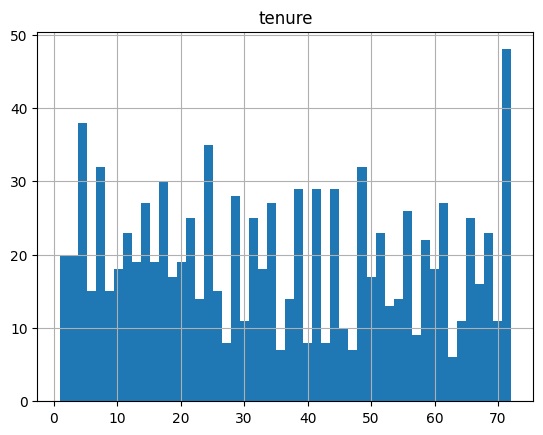

In [5]:
df.hist(column='tenure', bins=50)

# also visualize each columns by replacing column's names, ex- columns = 'income'

In [6]:
# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array: astype(float)

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [7]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

                                   Train Test Split
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [9]:
# Data Standardization gives the data zero mean and unit variance.
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Training the Data (K=4)

In [11]:
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [12]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[-1.13100942, -0.93533648, -0.93817795,  1.02020406, -0.36233308,
         0.17102716, -0.58336825,  0.00666863, -0.21707238, -1.13967126,
         1.97590703],
       [-1.13100942, -1.44823286, -0.13972863, -0.98019606,  0.03474427,
        -0.50017376, -0.58336825, -0.56492821, -0.21707238, -1.13967126,
        -0.90337462],
       [-1.13100942, -0.51569399,  1.53701494,  1.02020406, -0.56087175,
         0.45499678,  0.9619781 , -0.75546048, -0.21707238,  0.87744601,
         1.25608662],
       [-1.13100942, -0.74882871, -0.85833302,  1.02020406, -1.15648777,
        -0.70669712,  0.9619781 , -0.85072662, -0.21707238, -1.13967126,
         0.53626621],
       [-1.13100942,  0.51009876, -1.01802288,  1.02020406, -0.75941043,
         0.17102716,  1.73465128, -0.75546048, -0.21707238, -1.13967126,
         1.25608662]])

Predicting

In [13]:
yhat = neigh.predict(X_test_norm)
yhat[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

                                       Accurcy Evaluation
 In multilabel classification, accuracy classification score is a function that computes subset accuracy                                      


In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.33


In [15]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
yhat6 = neigh6.predict(X_test_norm)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.5125
Test set Accuracy:  0.335


In [16]:
# We can calculate the accuracy of KNN for different values of k.

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.32 , 0.315, 0.335, 0.33 , 0.34 , 0.335, 0.35 , 0.34 , 0.335])

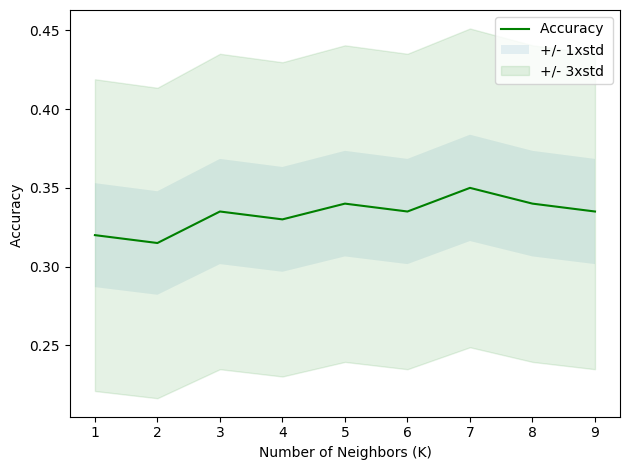

In [17]:
# Plot the model accuracy for a different number of neighbors.

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k= 7
